# Multiagent  Experiments Bag Recording Scripts, Plots and CSVs

Below we combine the data from from rosbags, analyse them save as csv. 

#### Import Libraries

In [53]:
import rosbag
from geometry_msgs.msg import PoseWithCovarianceStamped, PointStamped
import os
import matplotlib.pyplot as plt
import numpy as np
import random
BOLD = '\033[1m'
NORMAL = '\033[0m'

#### Print All Bag Names

In [54]:
# sa or ma
path = 'ma/'
bags = os.listdir(path)
print(BOLD+'List of bags:'+NORMAL+'{}'.format(bags))
sample_bag = rosbag.Bag(path+bags[random.randint(0,20)])

print(BOLD+'\n List of Topics Recorded:'+NORMAL+'{}'.format(sample_bag.get_type_and_topic_info()[1].keys()))

List of bags:['ma_aircap12_2020-05-15-02-53-46.bag', 'ma_aircap17_2020-05-15-03-12-04.bag', 'ma_aircap5_2020-05-15-02-28-09.bag', 'ma_aircap16_2020-05-15-03-08-24.bag', 'ma_aircap2_2020-05-15-02-17-11.bag', 'ma_aircap8_2020-05-15-02-39-07.bag', 'ma_aircap1_2020-05-15-02-13-31.bag', 'ma_aircap4_2020-05-15-02-24-30.bag', 'ma_aircap10_2020-05-15-02-46-26.bag', 'ma_aircap3_2020-05-15-02-20-50.bag', 'ma_aircap19_2020-05-15-03-19-23.bag', 'ma_aircap18_2020-05-15-03-15-44.bag', 'ma_aircap9_2020-05-15-02-42-47.bag', 'ma_aircap6_2020-05-15-02-31-49.bag', 'ma_aircap11_2020-05-15-02-50-06.bag', 'ma_aircap14_2020-05-15-03-01-05.bag', 'ma_aircap13_2020-05-15-02-57-26.bag', 'ma_aircap0_2020-05-15-02-09-51.bag', 'ma_aircap15_2020-05-15-03-04-45.bag']

 List of Topics Recorded:['/machine_2/triangulated_alpha_root_cov_10', '/machine_2/triangulated_alpha_root_cov_11', '/machine_2/triangulated_alpha_root_cov_12', '/machine_2/triangulated_alpha_root_cov_13', '/multihmr_joints', '/machine_1/triangulated_al

#### Choose Topics to Read

In [55]:
centering_topics = ['/machine_1/centering','/machine_2/centering']
joints_topics = []
for machine in range(1,3):
    for joint in range(14):
        joints_topics.append('/machine_'+str(machine)+'/triangulated_weighted_root_cov_'+str(joint))
print(BOLD+'joint error topics:'+NORMAL+'{}'.format(joints_topics))

joint error topics:['/machine_1/triangulated_weighted_root_cov_0', '/machine_1/triangulated_weighted_root_cov_1', '/machine_1/triangulated_weighted_root_cov_2', '/machine_1/triangulated_weighted_root_cov_3', '/machine_1/triangulated_weighted_root_cov_4', '/machine_1/triangulated_weighted_root_cov_5', '/machine_1/triangulated_weighted_root_cov_6', '/machine_1/triangulated_weighted_root_cov_7', '/machine_1/triangulated_weighted_root_cov_8', '/machine_1/triangulated_weighted_root_cov_9', '/machine_1/triangulated_weighted_root_cov_10', '/machine_1/triangulated_weighted_root_cov_11', '/machine_1/triangulated_weighted_root_cov_12', '/machine_1/triangulated_weighted_root_cov_13', '/machine_2/triangulated_weighted_root_cov_0', '/machine_2/triangulated_weighted_root_cov_1', '/machine_2/triangulated_weighted_root_cov_2', '/machine_2/triangulated_weighted_root_cov_3', '/machine_2/triangulated_weighted_root_cov_4', '/machine_2/triangulated_weighted_root_cov_5', '/machine_2/triangulated_weighted_ro

#### Read chosen topics from all bags and append them to create a single array

In [72]:
centering_data = []; joints_data = [];mean_data = []
avg_centering_data = []


print(BOLD+'Reading Centering Errors...'+NORMAL)
for bag in bags:
    messages = rosbag.Bag(path+bag)
    print('Reading {}'.format(bag))
    dict_centering = {}
    for topic, msg, t in messages.read_messages(topics=centering_topics):                
        centering_data.append(msg.point.x)
        time = t.to_time()
        if time in dict_centering:          
            dict_centering[t.to_time()]+= msg.point.x
            dict_centering[t.to_time()] = dict_centering[t.to_time()]/2
        else:
            dict_centering[t.to_time()] = msg.point.x
    avg_centering_data.extend(dict_centering.values())
    
centering_data = np.array(centering_data)
avg_centering_data = np.array(avg_centering_data)

#Reading data from joint errors
print(BOLD+'Reading Joint Errors...'+NORMAL)
for bag in bags:
    messages = rosbag.Bag(path+bag)
    print('Reading {}'.format(bag))
    joints_data_dict = {};message_counter = 0
    for topic, msg, t in messages.read_messages(topics=joints_topics):                
        joints_data.append([msg.pose.covariance[0],msg.pose.covariance[7],msg.pose.covariance[14]])
        time =t.to_time()
        key = message_counter//14
        message_counter+=1
        if key in joints_data_dict:
            joints_data_dict[key]+= [np.sqrt([msg.pose.covariance[0]+\
                                           msg.pose.covariance[7]+\
                                           msg.pose.covariance[14]])]
        else:
            joints_data_dict[key] = [np.sqrt([msg.pose.covariance[0]+\
                                           msg.pose.covariance[7]+\
                                           msg.pose.covariance[14]])]
    
    for t in joints_data_dict.keys():
        joints_data_dict[t] = np.mean(joints_data_dict[t])
    
    mean_data.extend(joints_data_dict.values())

data = np.sqrt(np.squeeze(np.array([joints_data]),axis=0))
norm_joints_data = np.linalg.norm(data,axis=1)
mean_data = np.array(mean_data)

Reading Centering Errors...
Reading ma_aircap12_2020-05-15-02-53-46.bag
Reading ma_aircap17_2020-05-15-03-12-04.bag
Reading ma_aircap5_2020-05-15-02-28-09.bag
Reading ma_aircap16_2020-05-15-03-08-24.bag
Reading ma_aircap2_2020-05-15-02-17-11.bag
Reading ma_aircap8_2020-05-15-02-39-07.bag
Reading ma_aircap1_2020-05-15-02-13-31.bag
Reading ma_aircap4_2020-05-15-02-24-30.bag
Reading ma_aircap10_2020-05-15-02-46-26.bag
Reading ma_aircap3_2020-05-15-02-20-50.bag
Reading ma_aircap19_2020-05-15-03-19-23.bag
Reading ma_aircap18_2020-05-15-03-15-44.bag
Reading ma_aircap9_2020-05-15-02-42-47.bag
Reading ma_aircap6_2020-05-15-02-31-49.bag
Reading ma_aircap11_2020-05-15-02-50-06.bag
Reading ma_aircap14_2020-05-15-03-01-05.bag
Reading ma_aircap13_2020-05-15-02-57-26.bag
Reading ma_aircap0_2020-05-15-02-09-51.bag
Reading ma_aircap15_2020-05-15-03-04-45.bag
Reading Joint Errors...
Reading ma_aircap12_2020-05-15-02-53-46.bag
Reading ma_aircap17_2020-05-15-03-12-04.bag


KeyboardInterrupt: 

In [85]:
centering_data = []; joints_data = [];mean_data = []
dict_centering_1 = []
dict_centering_2 = []


print(BOLD+'Reading Centering Errors...'+NORMAL)
for bag in bags:
    messages = rosbag.Bag(path+bag)
    print('Reading {}'.format(bag))
    
    for topic, msg, t in messages.read_messages(topics='/machine_1/centering'):                
        time = t.to_time()
        dict_centering_1.append([t.to_time(), msg.point.x])
    for topic, msg, t in messages.read_messages(topics='/machine_2/centering'):                
        time = t.to_time()
        dict_centering_2.append([t.to_time(), msg.point.x])        

dict_centering_1 = np.array(dict_centering_1)
dict_centering_2 = np.array(dict_centering_2)
print(dict_centering_1)
print(dict_centering_2)
np.savetxt(folder+"ma_aircap_centering_robot1.csv", dict_centering_1, delimiter=",")
np.savetxt(folder+"ma_aircap_centering_robot2.csv", dict_centering_2, delimiter=",")


Reading Centering Errors...
Reading ma_aircap12_2020-05-15-02-53-46.bag
Reading ma_aircap17_2020-05-15-03-12-04.bag
Reading ma_aircap5_2020-05-15-02-28-09.bag
Reading ma_aircap16_2020-05-15-03-08-24.bag
Reading ma_aircap2_2020-05-15-02-17-11.bag
Reading ma_aircap8_2020-05-15-02-39-07.bag
Reading ma_aircap1_2020-05-15-02-13-31.bag
Reading ma_aircap4_2020-05-15-02-24-30.bag
Reading ma_aircap10_2020-05-15-02-46-26.bag
Reading ma_aircap3_2020-05-15-02-20-50.bag
Reading ma_aircap19_2020-05-15-03-19-23.bag
Reading ma_aircap18_2020-05-15-03-15-44.bag
Reading ma_aircap9_2020-05-15-02-42-47.bag
Reading ma_aircap6_2020-05-15-02-31-49.bag
Reading ma_aircap11_2020-05-15-02-50-06.bag
Reading ma_aircap14_2020-05-15-03-01-05.bag
Reading ma_aircap13_2020-05-15-02-57-26.bag
Reading ma_aircap0_2020-05-15-02-09-51.bag
Reading ma_aircap15_2020-05-15-03-04-45.bag
[[  65.78       1155.52974864]
 [  65.95        601.29192376]
 [  66.07        613.97048499]
 ...
 [ 185.49        235.60643982]
 [ 185.64       

## Boxplot and histogram of centering 

Note that the large counts in the last bin indicate that the person was lost in the image a majority of the time.

[800.18328787 546.23439083 573.14992482 ... 356.45831464 391.11566968
 423.61196318]


(array([1.550e+02, 7.280e+02, 1.019e+03, 1.270e+03, 1.771e+03, 2.449e+03,
        2.512e+03, 1.658e+03, 4.651e+03, 2.000e+00]),
 array([  50.30500227,  178.73273836,  307.16047446,  435.58821055,
         564.01594664,  692.44368273,  820.87141882,  949.29915491,
        1077.726891  , 1206.1546271 , 1334.58236319]),
 <a list of 10 Patch objects>)

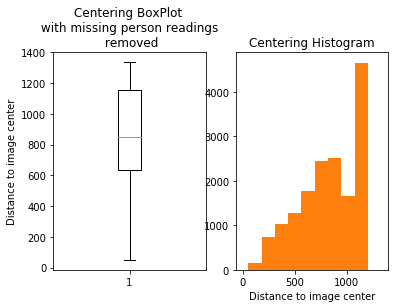

In [99]:

fig1, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Centering BoxPlot \n with missing person readings \n removed')
ax1.set_ylabel('Distance to image center')
ax1.boxplot(mean_data, showfliers=False)

ax2.set_title('Centering Histogram')
ax2.set_xlabel('Distance to image center')
ax2.hist(mean_data)

## Box Plot and Histogram of Norm of Joint Errors

The actor was outside the frame approximately 12 % of the time


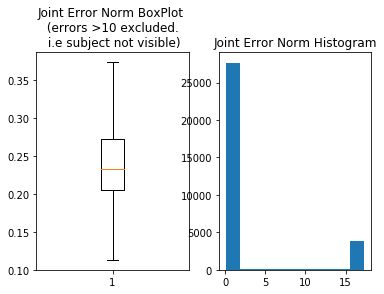

In [59]:
fig1, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Joint Error Norm BoxPlot \n (errors >10 excluded. \n i.e subject not visible)')
out = ax1.boxplot(mean_data[mean_data<10], showfliers=False)

ax2.set_title('Joint Error Norm Histogram')
out = ax2.hist(mean_data)

print('The actor was outside the frame approximately {} % of the time'.format(100*len(norm_joints_data[norm_joints_data>10])/len(norm_joints_data)))

## Write the numpy arrays to csv

In [60]:
folder='csvs/'
np.savetxt(folder+"ma_aircap_centering.csv", centering_data, delimiter=",")
np.savetxt(folder+"ma_aircap_avg_centering.csv", avg_centering_data, delimiter=",")
np.savetxt(folder+"ma_aircap_mocap.csv", data, delimiter=",")
np.savetxt(folder+"ma_aircap_mocap_norms.csv", mean_data, delimiter=",")
